In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime

In [2]:
df = pd.read_csv('articles.csv')

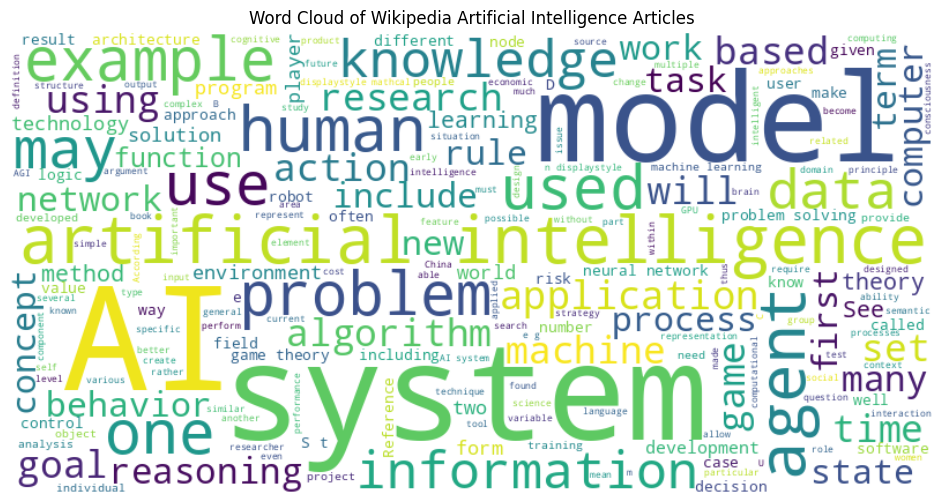

In [3]:
text = ' '.join(df['Extract'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Wikipedia Artificial Intelligence Articles')
plt.show()

In [4]:
df['Revisions'] = df['Revisions'].apply(lambda x: x.split('; ') if pd.notnull(x) else [])

In [5]:
all_revisions = []

In [6]:
for revisions in df['Revisions']:
    all_revisions.extend(revisions)

In [7]:
all_revisions = [datetime.strptime(ts, '%Y-%m-%dT%H:%M:%SZ') for ts in all_revisions]

In [8]:
revisions_df = pd.DataFrame(all_revisions, columns=['timestamp'])

In [9]:
revisions_df['date'] = revisions_df['timestamp'].dt.date

In [10]:
revisions_by_date = revisions_df.groupby('date').size()

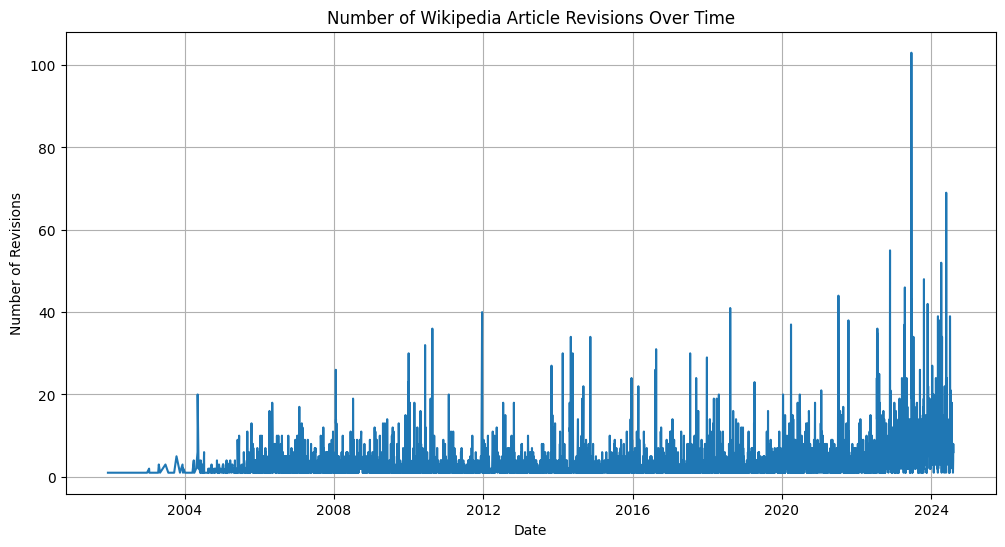

In [11]:
plt.figure(figsize=(12, 6))
revisions_by_date.plot()
plt.title('Number of Wikipedia Article Revisions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Revisions')
plt.grid(True)
plt.show()

In [12]:
revisions_by_date = revisions_df.groupby('date').size().reset_index(name='count')

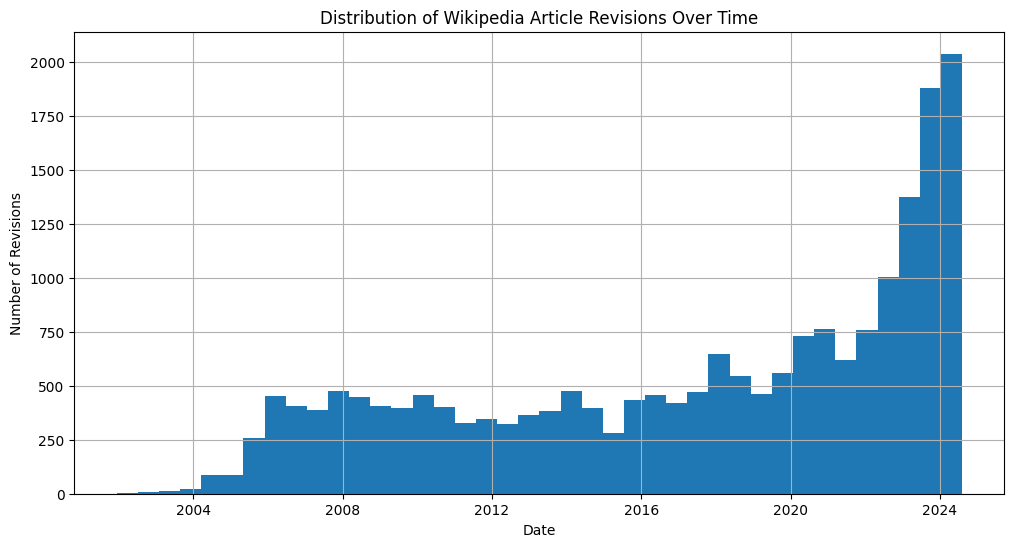

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(revisions_df['timestamp'], bins=40)
plt.title('Distribution of Wikipedia Article Revisions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Revisions')
plt.grid(True)
plt.show()